### <center> Algorithm Steps </center>

- **Loaded the data**: Loaded the student data from a CSV file into a Pandas DataFrame.
- **Displayed the original records**: Printed the original student records to ensure the data was loaded correctly.
- **Loop to Test Different Values of K**: Added a loop to test to test how the grouping behaves with varying numbers of groups. 
- **Sorted the data**: Sorted the DataFrame by profession (ascending) and by score (descending) to organize students based on these attributes.
- **Displayed the sorted data**: Printed the sorted student data to verify the organization of students by profession and score.
- **Initialized the groups**: Decided to create three groups and set up empty lists for each one to store students.
- **Distributed the students**: For each unique profession, filtered the students and distributed them evenly into the groups using a round-robin method to ensure balance.
- **Check for empty groups**: If not enough data exists to fill all K number of groups, it reduces the number of groups and redistributes students accordingly.
- **Calculated the averages**: Created a function to calculate the average score for each group to measure performance distribution.
- **Calculated the standard deviation**: Computed the initial standard deviation of the group averages to assess the variation between groups.
- **Check for standard deviation ≤ 2**: Added a check to skip the swapping process if the initial standard deviation was already ≤ 2.
- **Displayed the initial distribution**: Printed the initial distribution of students in each group, including average scores and the standard deviation.
- **Swapped students**:
    - Defined a function to minimize the standard deviation by swapping students between groups:
    - Identified the group with the highest average score and the group with the lowest average score.
    - Swapped the highest-scoring student from the group with the highest average score with the lowest-scoring student from the group with the lowest average score, focusing on students with the same profession.
    - I also added an iteration counter to track how many times the algorithm has tried to find a better group configuration. It allows to see at which iteration no improvements were possible before exiting the loop.
- **Balance groups until std achieved**: Called the swap function to check if the swap reduced the group averages' standard deviation, also checking updated std is less then or equal to 2, if not calling swap function again until it reached to std of <=2. Added a tolerance check to add flexibility in  meeting the final standard deviation.
- **Displayed the updated distribution**: Printed the updated distribution of students in each group after the swap and the new standard deviation.
- **Compared the results**: Showed both the initial and final standard deviations to analyze the improvement (if any).
- **Try Catch Block**: Added try catch blocks to handle exceotion in file reading etc.
- **Bar Chart Generation**: Dynamically generated bar charts for each group, displaying the count of professions, and a separate bar for overall standard deviation.



In [4]:
import os  # This imports the OS module to work with file paths.
import pandas as pd  # This imports pandas, this will be used for data manipulation and analysis.
import numpy as np  # This imports NumPy, this will be used for numerical operations.
import matplotlib.pyplot as plt  # To create bar charts

In [5]:
def plot_combined_charts_with_std(groups, group_averages):
    # Determine the number of groups (K)
    num_groups = len(groups)

    # Create a figure with subplots based on the number of groups + 1 (to include the std chart)
    fig, axes = plt.subplots(1, num_groups + 1, figsize=(18, 6))  # Increased width for better label visibility

    # Plot bar charts for each group showing profession counts
    for i, group in enumerate(groups):
        group_df = pd.DataFrame(group)
        profession_counts = group_df['profession'].value_counts()

        # Plot the bar chart for each group's professions
        bars = axes[i].bar(profession_counts.index, profession_counts.values, color=['#ff9999', '#66b3ff', '#99ff99'])
        axes[i].set_title(f'Group {i + 1}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Profession')
        axes[i].set_ylabel('Count')
        axes[i].set_ylim(0, max(profession_counts.values) + 2)  # Dynamic y-limit based on max profession count

        # Set tick positions and labels for better readability
        axes[i].set_xticks(np.arange(len(profession_counts.index)))  # Set positions of the ticks
        axes[i].set_xticklabels(profession_counts.index, rotation=45, ha='right', fontsize=10)  # Set the labels

    # Plot the standard deviations as a bar chart in the last subplot
    axes[num_groups].bar(['Final Std Dev'], [np.std(group_averages)], color=['#ffcc99'])
    axes[num_groups].set_title('Overall Std Dev', fontsize=12, fontweight='bold')
    axes[num_groups].set_ylim(0, 5)  # Adjust y-limit for clarity, depending on expected std dev range

    # Set the overall title for the entire figure
    plt.suptitle('Group-wise Profession Count and Standard Deviation', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title

    plt.show()


In [6]:
def process_file(file_path):
    try:
        # Load the student data from a CSV file into a DataFrame
        students_df = pd.read_csv(file_path)
        
        # Remove the 'Unnamed: 0' column
        students_df = students_df.drop(columns=['Unnamed: 0'])

        # Print which table's results are being displayed
        table_name = file_path.split('\\')[-1].replace('.csv', '')  # Extracting table name from file path
        print("\n" + "="*50)
        print(f"\033[1m{'Results for ' + table_name: ^50}\033[0m")  # Center the text and make it bold
        print("="*50)
        
        # Show the original student records to make sure the data was loaded correctly
        print("\nOriginal Student Data:")
        print(students_df.to_string(index=False))

        # Testing different values of K from 1 to 10
        for k in range(1, 11):
            print(f"\nTesting with K = {k}")

            # Step 1: Sorting the students by their profession and score
            students_sorted = students_df.sort_values(by=['profession', 'score'], ascending=[True, False])

            # Step 2: Initialize empty lists for each group
            groups = [[] for _ in range(k)]

            # Step 3: Distributing the students into groups based on their profession
            professions = students_sorted['profession'].unique()
            for profession in professions:
                profession_group = students_sorted[students_sorted['profession'] == profession]
                for i, (_, student) in enumerate(profession_group.iterrows()):
                    groups[i % k].append(student)

            # Step 4: Check for empty groups
            non_empty_groups = [group for group in groups if group]
            if len(non_empty_groups) < k:
                print(f"\nNot enough data to fill {k} groups. Reducing the number of groups to {len(non_empty_groups)}.")
                groups = non_empty_groups
                k = len(groups)

                # Redistribute students into the remaining groups if group count is updated
                groups = [[] for _ in range(k)]
                for profession in professions:
                    profession_group = students_sorted[students_sorted['profession'] == profession]
                    for i, (_, student) in enumerate(profession_group.iterrows()):
                        groups[i % k].append(student)

            # Step 5: Function to calculate the average score for each group
            def calculate_group_averages(groups):
                return [pd.DataFrame(group)['score'].mean() for group in groups]

            group_averages = calculate_group_averages(groups)
            
            # Step 6: Initial standard deviation of the group averages
            initial_std_dev = np.std(group_averages)

            # Step 7: Displaying the initial distribution of students in each group
            print("\nInitial Group Distribution:")
            for i, group in enumerate(groups):
                print(f"\nGroup {i+1}:")
                for student in group:
                    print(f"UserId: {student['userId']}, Score: {student['score']}, Profession: {student['profession']}")
                print(f"Average Score: {group_averages[i]:.2f}")

            print(f"\nInitial Standard Deviation of Group Averages: {initial_std_dev:.2f}")

            # Function to swap students to balance groups
            def swap_students(groups, group_averages):
                high_group_idx = np.argmax(group_averages)
                low_group_idx = np.argmin(group_averages)
            
                high_group = pd.DataFrame(groups[high_group_idx])
                low_group = pd.DataFrame(groups[low_group_idx])
                best_std_dev = np.std(group_averages)
                best_swap = None
                improvement = False
            
                # Initialize iteration counter
                iteration = 0
            
                # Try swapping students of each profession in the high and low groups
                for profession in high_group['profession'].unique():
                    iteration += 1
                    high_prof_students = high_group[high_group['profession'] == profession]
                    low_prof_students = low_group[low_group['profession'] == profession]
            
                    # Only proceed if both groups have students of this profession
                    if not high_prof_students.empty and not low_prof_students.empty:
                        for _, high_student in high_prof_students.iterrows():
                            for _, low_student in low_prof_students.iterrows():
                                # Create a temporary copy of groups for swapping
                                temp_groups = [group.copy() for group in groups]
                                temp_groups[high_group_idx] = [s for s in temp_groups[high_group_idx] if s['userId'] != high_student['userId']]
                                temp_groups[low_group_idx] = [s for s in temp_groups[low_group_idx] if s['userId'] != low_student['userId']]
                                
                                # Perform the swap
                                temp_groups[high_group_idx].append(low_student)
                                temp_groups[low_group_idx].append(high_student)
            
                                # Calculate new group averages and standard deviation
                                temp_group_averages = calculate_group_averages(temp_groups)
                                temp_std_dev = np.std(temp_group_averages)
            
                                # Update best swap if found
                                if temp_std_dev < best_std_dev:
                                    best_std_dev = temp_std_dev
                                    best_swap = (high_student, low_student)
                                    improvement = True
            
                # Perform the best swap if it exists
                if best_swap:
                    high_student, low_student = best_swap
                    groups[high_group_idx] = [s for s in groups[high_group_idx] if s['userId'] != high_student['userId']]
                    groups[low_group_idx] = [s for s in groups[low_group_idx] if s['userId'] != low_student['userId']]
                    groups[high_group_idx].append(low_student)
                    groups[low_group_idx].append(high_student)
                    
                    print(f"\nSwapping UserId {high_student['userId']} with UserId {low_student['userId']} improved std_dev to {best_std_dev:.2f}")
                    return best_std_dev, calculate_group_averages(groups)
            
                # Indicate no improvement possible
                print(f"\nNo improvement possible with current configuration at iteration {iteration}.")
                return None, group_averages


            # This function attempts to balance groups until the standard deviation is less than or equal to 2.
            def balance_groups_until_std(groups, group_averages, max_attempts=10):
                std_dev = np.std(group_averages)
                attempts = 0  # Keep track of the number of swap attempts made
                while std_dev > 2 and attempts < max_attempts:
                    new_std_dev, new_group_averages = swap_students(groups, group_averages)
                    if new_std_dev is None:
                        break  # No more improvements possible
                    else:
                        std_dev, group_averages = new_std_dev, new_group_averages
                    attempts += 1
                # Final message based on actual standard deviation
                tolerance = 0.1
                if std_dev <= 2 + tolerance:
                    print(f"\nFinal balancing achieved with a standard deviation of {std_dev:.2f}.")
                else:
                    print(f"\nUnable to reach a standard deviation <= 2. Final standard deviation: {std_dev:.2f}.")

                return std_dev, group_averages

            # Apply the balancing function
            if initial_std_dev <= 2:
                final_std_dev = initial_std_dev
            else:
                final_std_dev, group_averages = balance_groups_until_std(groups, group_averages)

            # Display the updated group distribution and final standard deviation
            if final_std_dev is not None:
                print("\nUpdated Group Distribution After Swap:")
                for i, group in enumerate(groups):
                    print(f"\nGroup {i + 1}:")
                    for student in group:
                        print(f"UserId: {student['userId']}, Score: {student['score']}, Profession: {student['profession']}")
                    print(f"Updated Average Score: {group_averages[i]:.2f}")
        
                print(f"\nFinal Standard Deviation of Group Averages: {final_std_dev:.2f}")
            else:
                # If no swaps were performed or no improvement was possible
                print("\nNo significant improvements could be achieved.")

            # Step 13: Generate Bar Charts for each group and overall standard deviation
            plot_combined_charts_with_std(groups, group_averages)

    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: No data found in the file {file_path}.")
    except Exception as e:
        print(f"An error occurred: {e}")



                Results for table5                

Original Student Data:
 userId  score profession   group
      3     90     Doctor Group 0
      1     98   Engineer Group 0
      9     70   Engineer Group 0
      6     83     Doctor Group 2
      2     92   Engineer Group 1
      5     85    Teacher Group 1
      8     75     Doctor Group 1
      4     87   Engineer Group 2
      7     78    Teacher Group 2

Testing with K = 1

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 6, Score: 83, Profession: Doctor
UserId: 8, Score: 75, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 2, Score: 92, Profession: Engineer
UserId: 4, Score: 87, Profession: Engineer
UserId: 9, Score: 70, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.22

Initial Standard Deviation of Group Averages: 0.00

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Score: 90, P

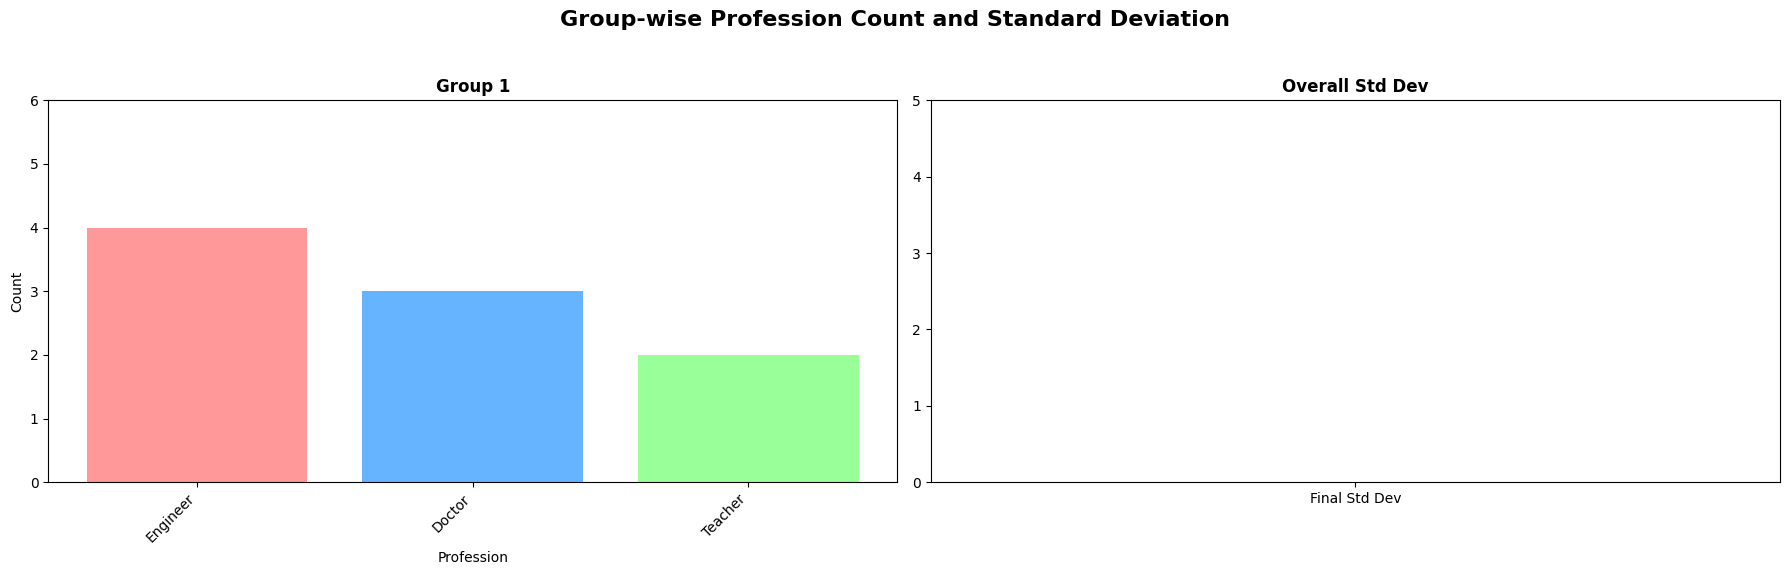


Testing with K = 2

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 8, Score: 75, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 4, Score: 87, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 87.00

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 9, Score: 70, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 80.75

Initial Standard Deviation of Group Averages: 3.12

Swapping UserId 4 with UserId 9 improved std_dev to 0.70

Final balancing achieved with a standard deviation of 0.70.

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 8, Score: 75, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
UserId: 9, Score: 70, Profession: Engineer
Updated Average Score: 83.60

Group 2:
UserId: 6, Score: 83, Profession: Doctor

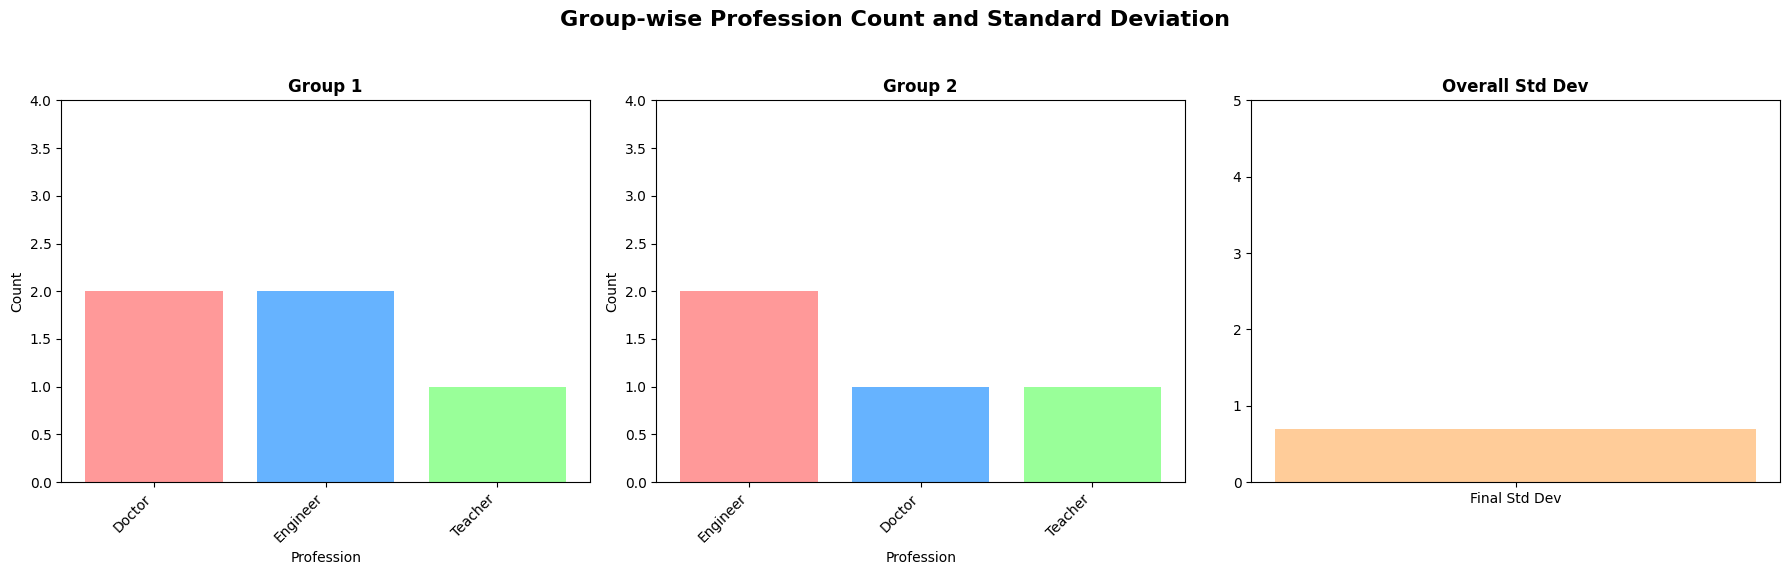


Testing with K = 3

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 9, Score: 70, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 85.75

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.33

Group 3:
UserId: 8, Score: 75, Profession: Doctor
UserId: 4, Score: 87, Profession: Engineer
Average Score: 81.00

Initial Standard Deviation of Group Averages: 1.99

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 9, Score: 70, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Updated Average Score: 85.75

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Updated Average Score: 84.33

Group 3:
User

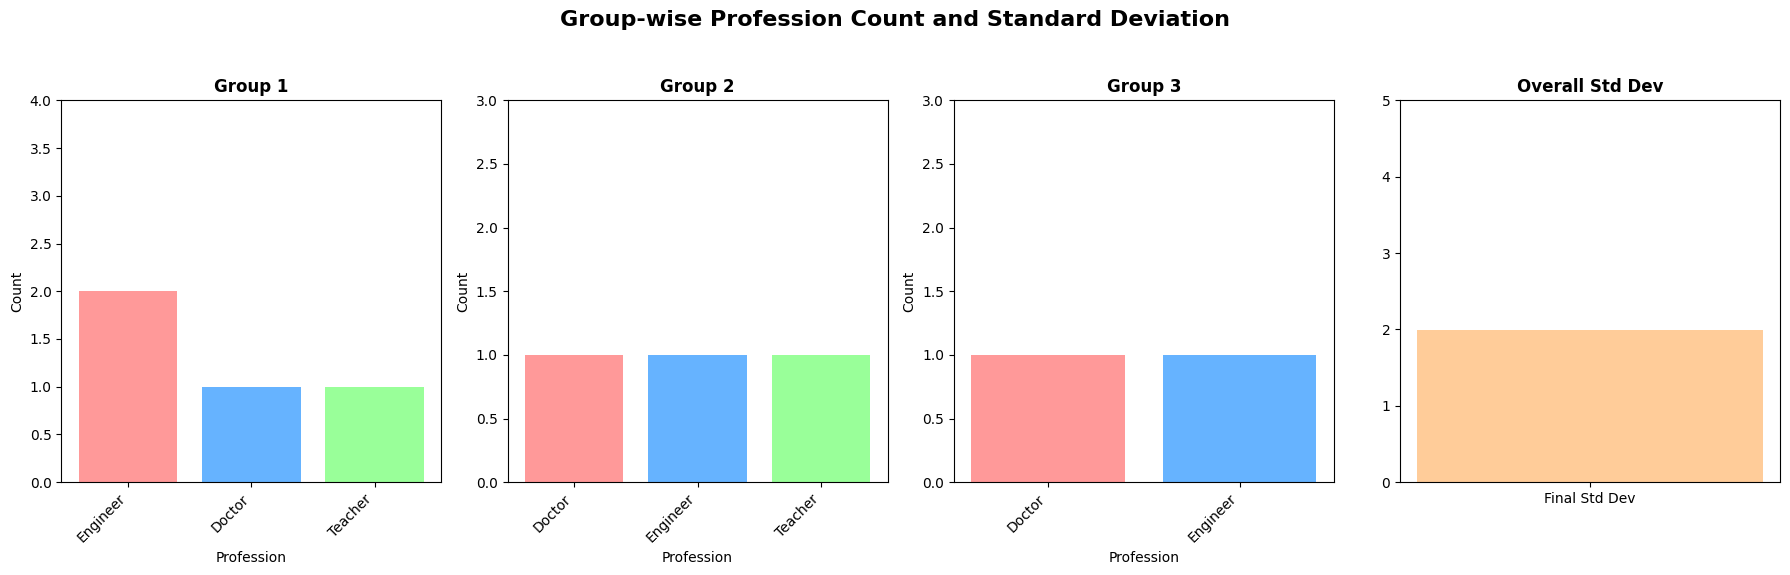


Testing with K = 4

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 91.00

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.33

Group 3:
UserId: 8, Score: 75, Profession: Doctor
UserId: 4, Score: 87, Profession: Engineer
Average Score: 81.00

Group 4:
UserId: 9, Score: 70, Profession: Engineer
Average Score: 70.00

Initial Standard Deviation of Group Averages: 7.60

Swapping UserId 1 with UserId 9 improved std_dev to 6.90

Swapping UserId 1 with UserId 4 improved std_dev to 2.11

No improvement possible with current configuration at iteration 1.

Unable to reach a standard deviation <= 2. Final standard deviation: 2.11.

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 5, Score: 85, Profession: Teacher
Use

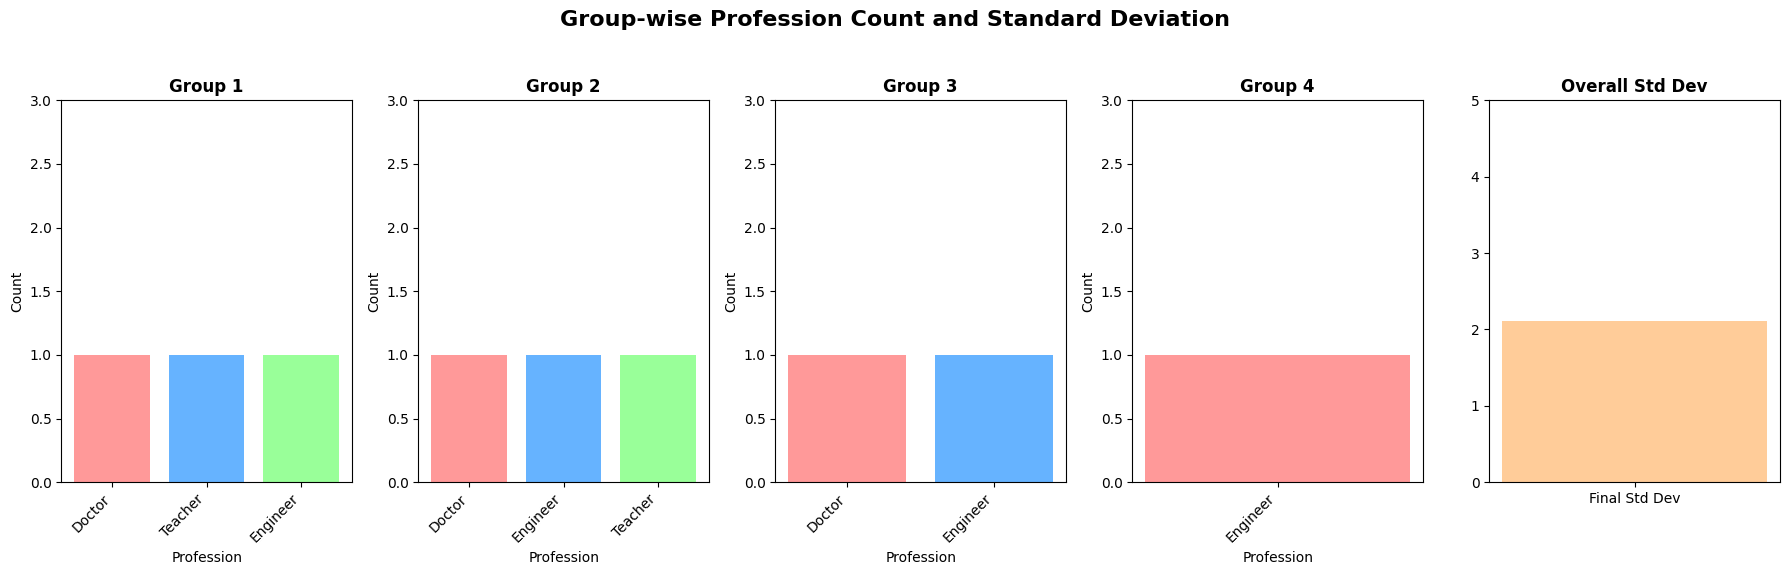


Testing with K = 5

Not enough data to fill 5 groups. Reducing the number of groups to 4.

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 91.00

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.33

Group 3:
UserId: 8, Score: 75, Profession: Doctor
UserId: 4, Score: 87, Profession: Engineer
Average Score: 81.00

Group 4:
UserId: 9, Score: 70, Profession: Engineer
Average Score: 70.00

Initial Standard Deviation of Group Averages: 7.60

Swapping UserId 1 with UserId 9 improved std_dev to 6.90

Swapping UserId 1 with UserId 4 improved std_dev to 2.11

No improvement possible with current configuration at iteration 1.

Unable to reach a standard deviation <= 2. Final standard deviation: 2.11.

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Scor

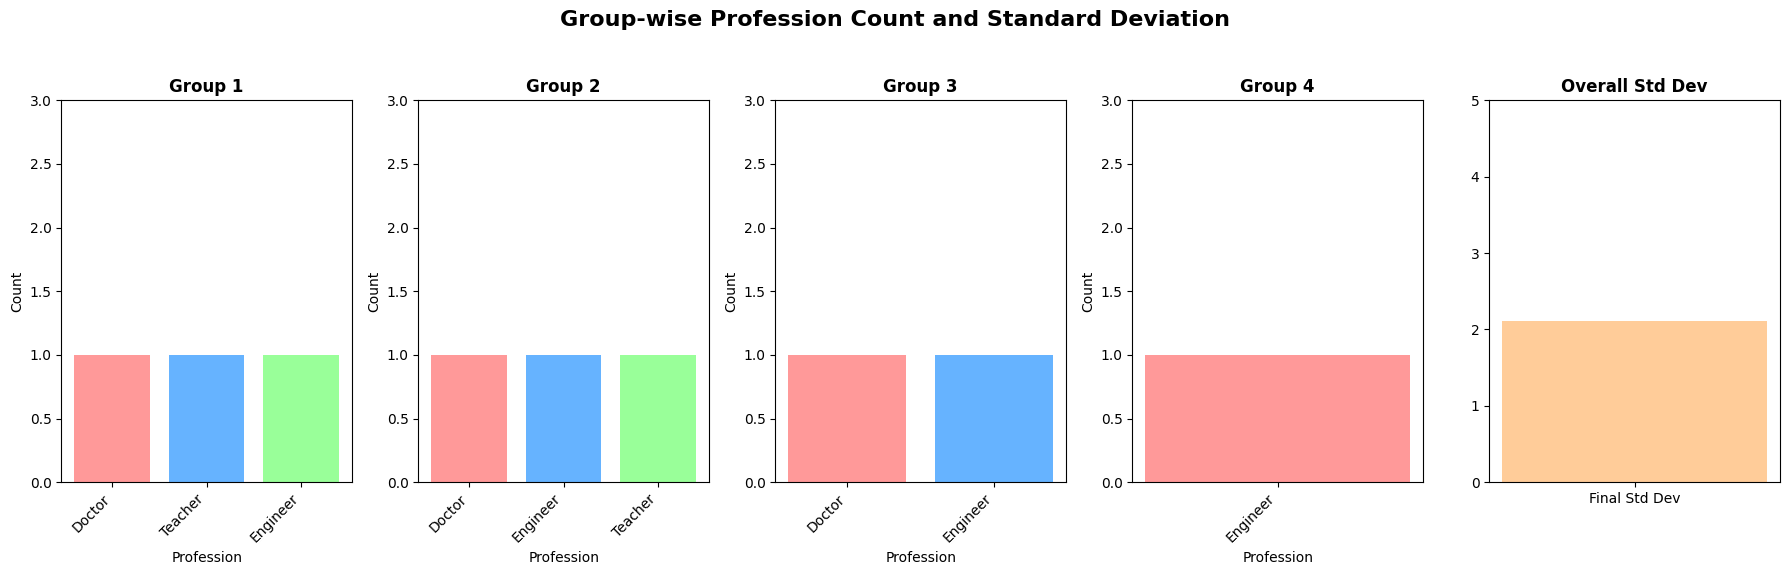


Testing with K = 6

Not enough data to fill 6 groups. Reducing the number of groups to 4.

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 91.00

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.33

Group 3:
UserId: 8, Score: 75, Profession: Doctor
UserId: 4, Score: 87, Profession: Engineer
Average Score: 81.00

Group 4:
UserId: 9, Score: 70, Profession: Engineer
Average Score: 70.00

Initial Standard Deviation of Group Averages: 7.60

Swapping UserId 1 with UserId 9 improved std_dev to 6.90

Swapping UserId 1 with UserId 4 improved std_dev to 2.11

No improvement possible with current configuration at iteration 1.

Unable to reach a standard deviation <= 2. Final standard deviation: 2.11.

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Scor

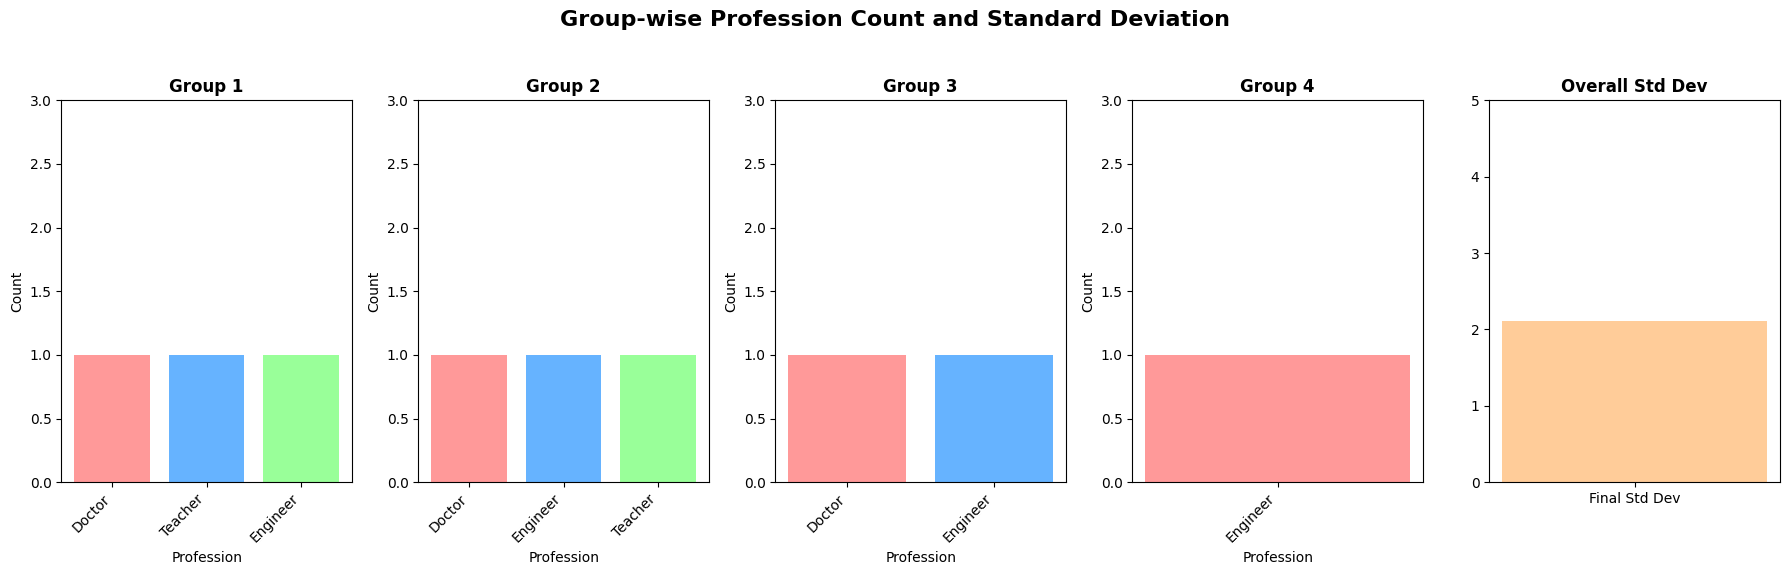


Testing with K = 7

Not enough data to fill 7 groups. Reducing the number of groups to 4.

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 91.00

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.33

Group 3:
UserId: 8, Score: 75, Profession: Doctor
UserId: 4, Score: 87, Profession: Engineer
Average Score: 81.00

Group 4:
UserId: 9, Score: 70, Profession: Engineer
Average Score: 70.00

Initial Standard Deviation of Group Averages: 7.60

Swapping UserId 1 with UserId 9 improved std_dev to 6.90

Swapping UserId 1 with UserId 4 improved std_dev to 2.11

No improvement possible with current configuration at iteration 1.

Unable to reach a standard deviation <= 2. Final standard deviation: 2.11.

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Scor

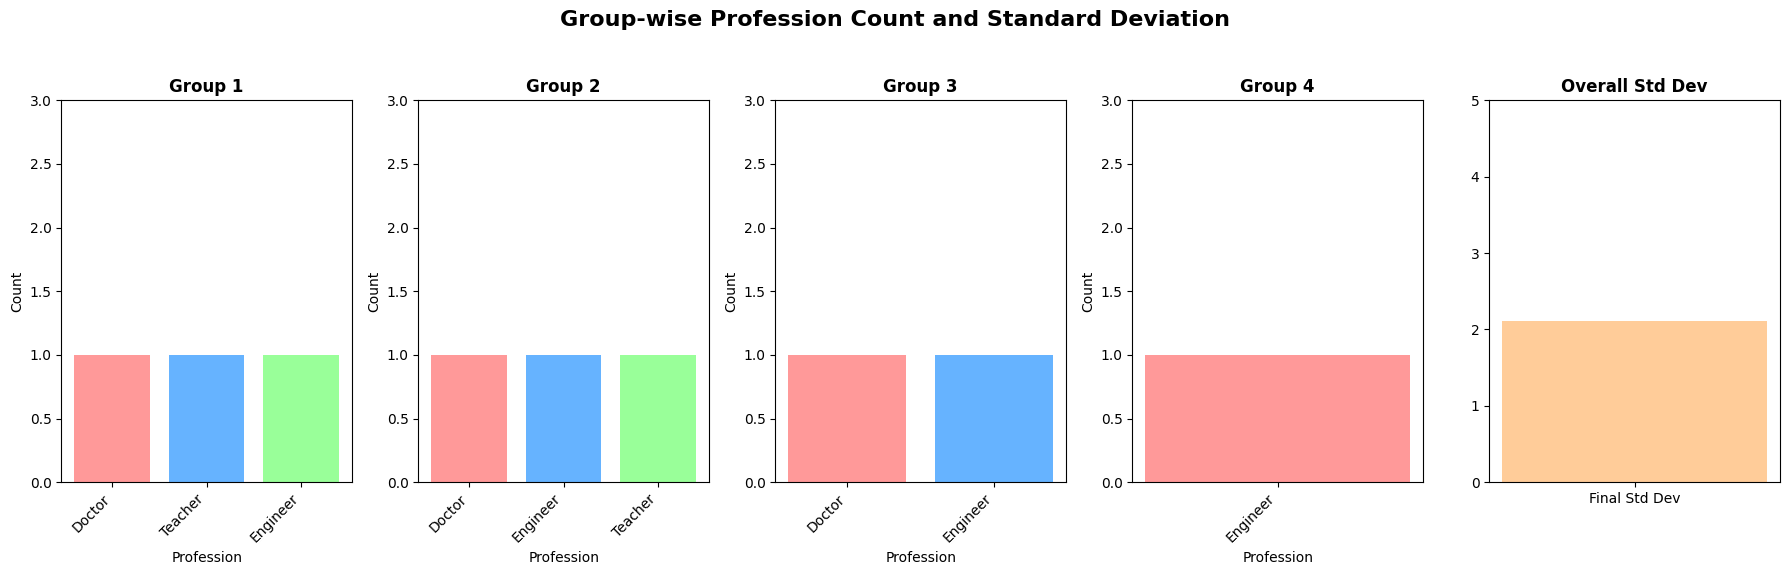


Testing with K = 8

Not enough data to fill 8 groups. Reducing the number of groups to 4.

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 91.00

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.33

Group 3:
UserId: 8, Score: 75, Profession: Doctor
UserId: 4, Score: 87, Profession: Engineer
Average Score: 81.00

Group 4:
UserId: 9, Score: 70, Profession: Engineer
Average Score: 70.00

Initial Standard Deviation of Group Averages: 7.60

Swapping UserId 1 with UserId 9 improved std_dev to 6.90

Swapping UserId 1 with UserId 4 improved std_dev to 2.11

No improvement possible with current configuration at iteration 1.

Unable to reach a standard deviation <= 2. Final standard deviation: 2.11.

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Scor

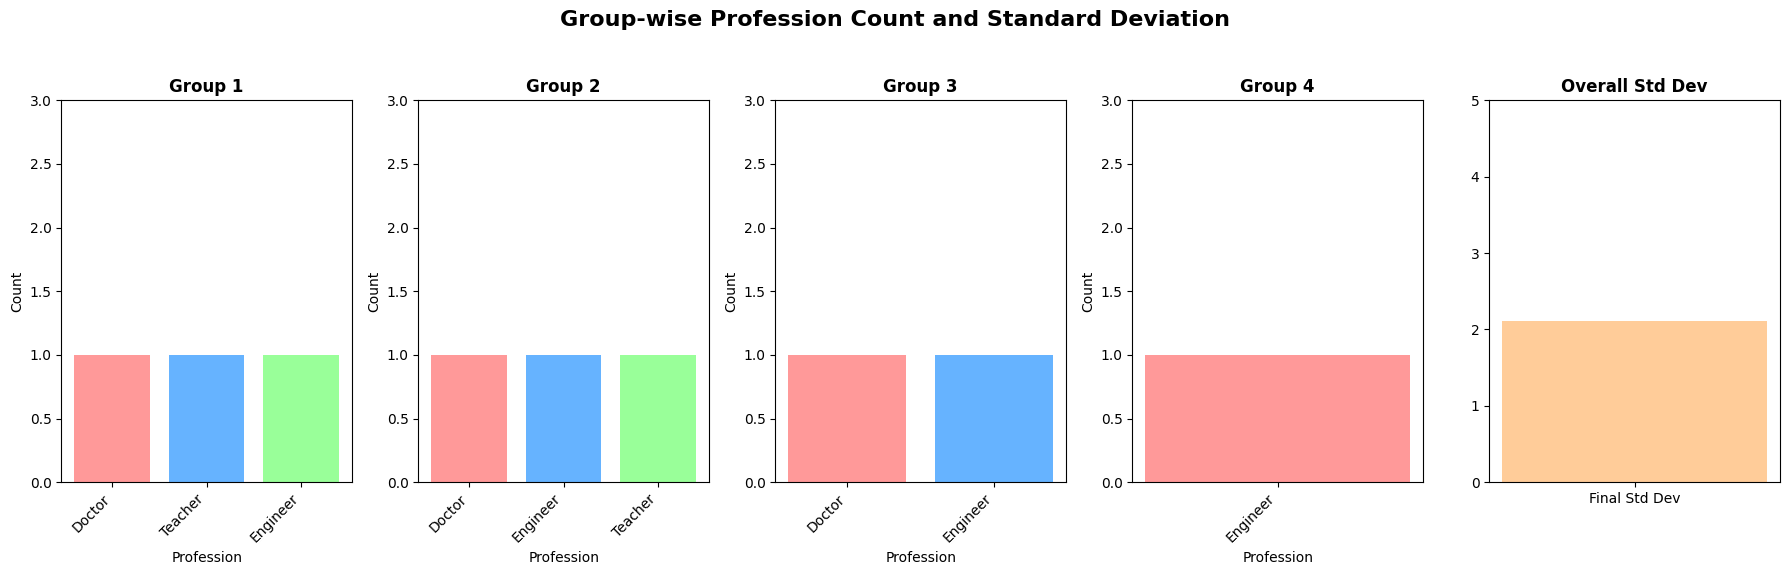


Testing with K = 9

Not enough data to fill 9 groups. Reducing the number of groups to 4.

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 91.00

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.33

Group 3:
UserId: 8, Score: 75, Profession: Doctor
UserId: 4, Score: 87, Profession: Engineer
Average Score: 81.00

Group 4:
UserId: 9, Score: 70, Profession: Engineer
Average Score: 70.00

Initial Standard Deviation of Group Averages: 7.60

Swapping UserId 1 with UserId 9 improved std_dev to 6.90

Swapping UserId 1 with UserId 4 improved std_dev to 2.11

No improvement possible with current configuration at iteration 1.

Unable to reach a standard deviation <= 2. Final standard deviation: 2.11.

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Scor

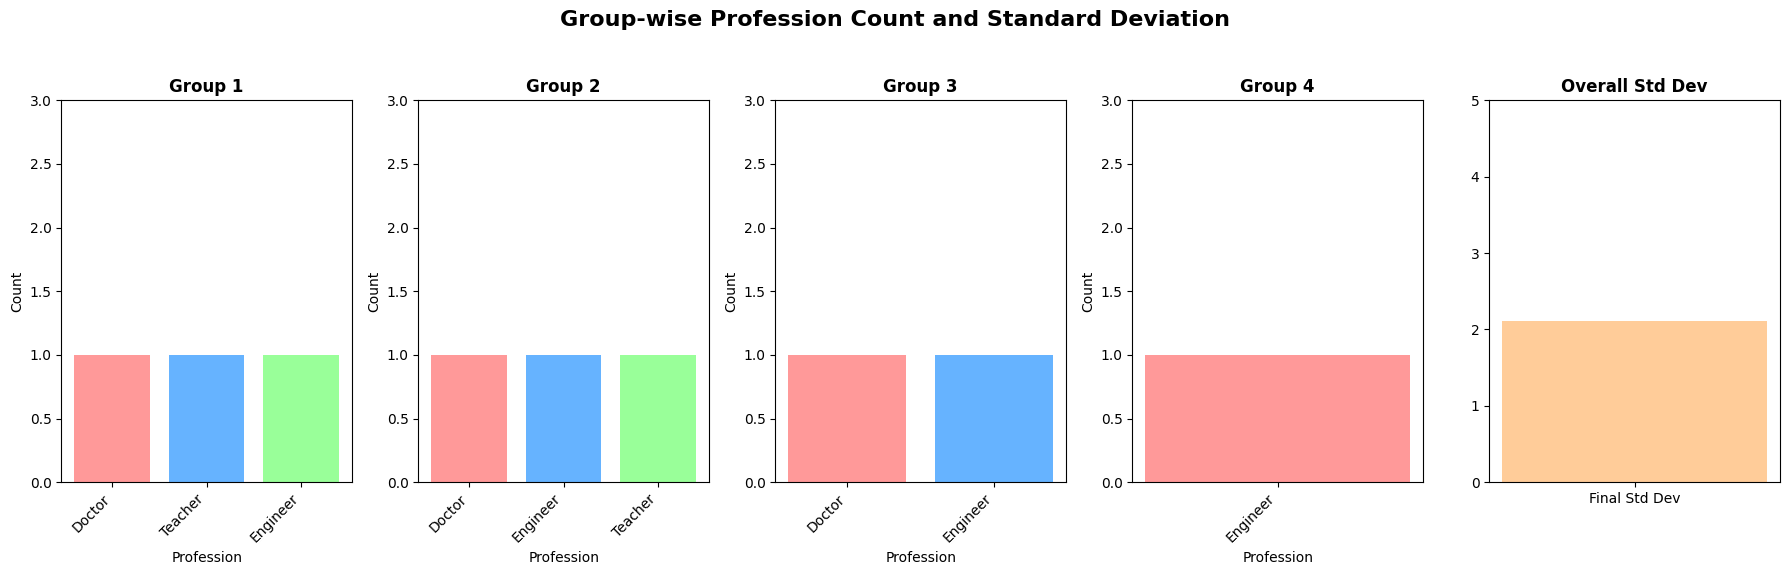


Testing with K = 10

Not enough data to fill 10 groups. Reducing the number of groups to 4.

Initial Group Distribution:

Group 1:
UserId: 3, Score: 90, Profession: Doctor
UserId: 1, Score: 98, Profession: Engineer
UserId: 5, Score: 85, Profession: Teacher
Average Score: 91.00

Group 2:
UserId: 6, Score: 83, Profession: Doctor
UserId: 2, Score: 92, Profession: Engineer
UserId: 7, Score: 78, Profession: Teacher
Average Score: 84.33

Group 3:
UserId: 8, Score: 75, Profession: Doctor
UserId: 4, Score: 87, Profession: Engineer
Average Score: 81.00

Group 4:
UserId: 9, Score: 70, Profession: Engineer
Average Score: 70.00

Initial Standard Deviation of Group Averages: 7.60

Swapping UserId 1 with UserId 9 improved std_dev to 6.90

Swapping UserId 1 with UserId 4 improved std_dev to 2.11

No improvement possible with current configuration at iteration 1.

Unable to reach a standard deviation <= 2. Final standard deviation: 2.11.

Updated Group Distribution After Swap:

Group 1:
UserId: 3, Sc

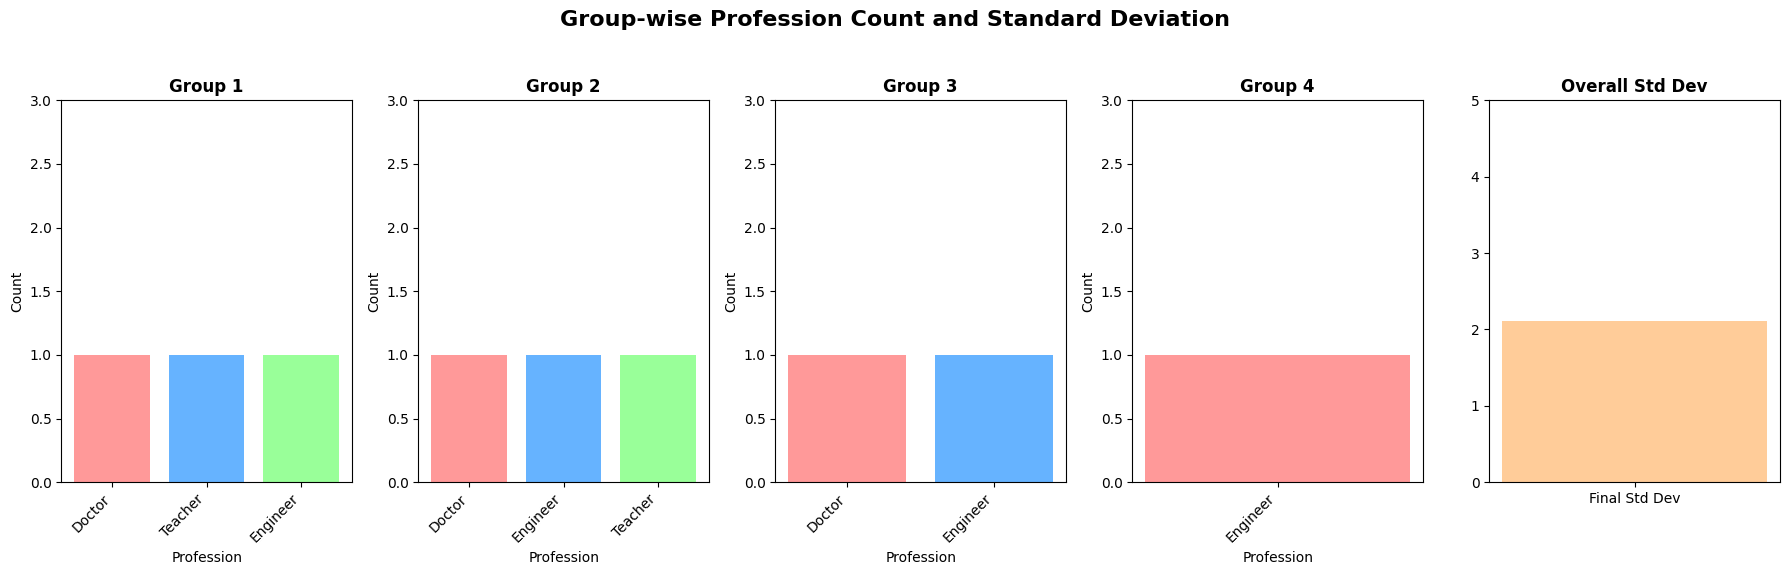

In [7]:
# List of file paths for all CSV files
file_paths = [
  #  r'D:\Naila Task\Tuesday 22-Oct-2024\table1.csv',
  #  r'D:\Naila Task\Tuesday 22-Oct-2024\table2.csv',
  #  r'D:\Naila Task\Tuesday 22-Oct-2024\table3.csv',
   # r'D:\Naila Task\Tuesday 22-Oct-2024\table4.csv',
    r'D:\Naila Task\Tuesday 22-Oct-2024\table5.csv',
]

# Process each file in the list
for file_path in file_paths:
    process_file(file_path)

<center><b>THE END</b></center>